In [1]:
from io import BytesIO
from PIL import Image
from typing import List

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from umap import UMAP

splits = {'train': 'mnist/train-00000-of-00001.parquet', 'test': 'mnist/test-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/ylecun/mnist/" + splits["test"])


In [2]:
def get_image_features(bytes: str) -> np.ndarray:
    image = Image.open(BytesIO(bytes))
    return np.array(image).flatten()  

In [3]:
data = np.array([get_image_features(bytes["bytes"]) for bytes in df["image"]])

/home/v1adych/micromamba/envs/umap-backend/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


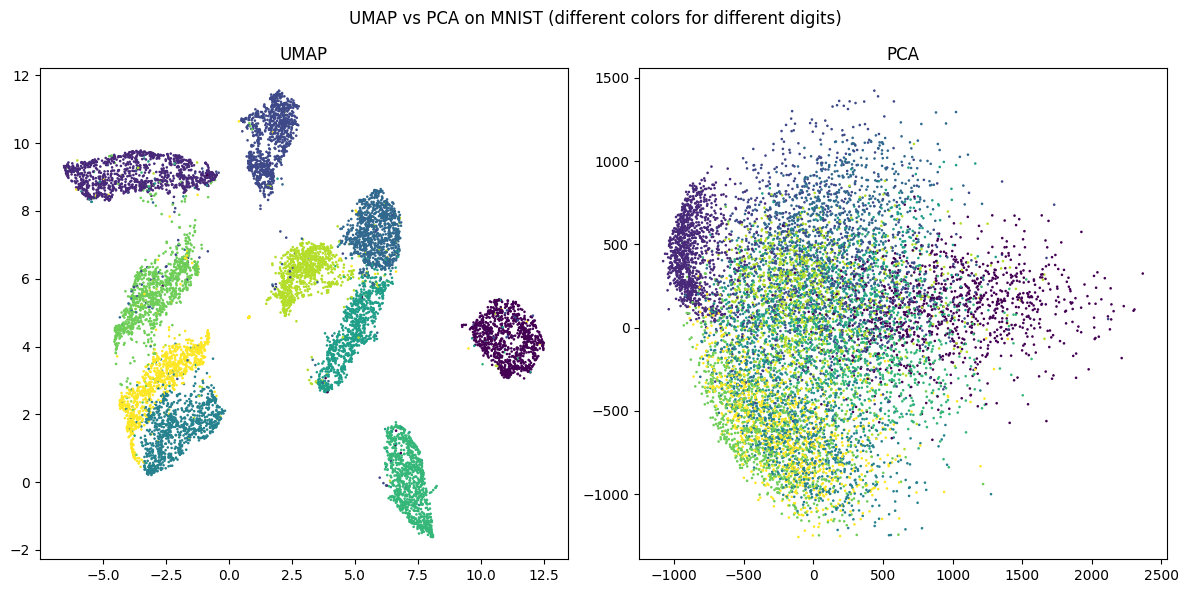

In [12]:
umap = UMAP()

umap_embedding = umap.fit_transform(data)

pca = PCA(n_components=2)
pca_embedding = pca.fit_transform(data)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=df["label"], s=0.75)
plt.title("UMAP")

plt.subplot(1, 2, 2)
plt.scatter(pca_embedding[:, 0], pca_embedding[:, 1], c=df["label"], s=0.75)
plt.title("PCA")

plt.suptitle("UMAP vs PCA on MNIST (different colors for different digits)")
plt.tight_layout()

plt.savefig("../public/pca_vs_umap.png")
plt.show()